# Factors Affecting Borrower APR

## by Maryam Adamu Bala

## Investigation Overview

This investigation will look at the features that could affect the APR of borrowers. The main focus is on the **original loan amount, ProsperRating (Alpha) and Loan Term.**

## Dataset Overview

This dataset contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.The dataset can be found [here](https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv) with feature documentation available [here](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0)

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loans = pd.read_csv('prosperLoanData.csv')

# convert ProsperRating (Alpha) to ordered categorical types

rating_order = ['AA', 'A', 'B','C', 'D', 'E', 'HR']
ordered = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = rating_order)
loans['ProsperRating (Alpha)'] = loans['ProsperRating (Alpha)'].astype(ordered)

## Borrower APR

The distribution of the Borrower APR is multimodal. A small peak centered at 0.09, a large peak centered at 0.18. There is also a small peak centered 0.29 and a high peak between 0.35 and 0.36. Very few people have an APR greater than 0.4.
A high APR means that you will be paying a higher interest rate on any money you borrow.

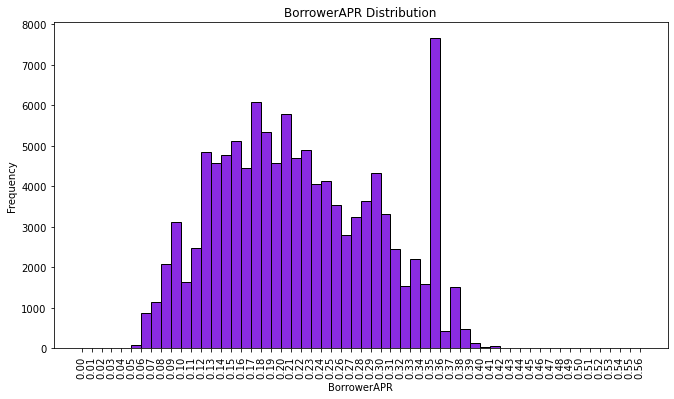

In [3]:
# plot a histogram for the distribution of the variable 

plt.figure(figsize = [11, 6])  
bins = np.arange(0, loans['BorrowerAPR'].max()+0.05, 0.01) 
plt.hist(data = loans, x='BorrowerAPR', bins = bins, color = 'blueviolet', edgecolor='black');
plt.xticks(ticks=bins, labels=['{:.2f}'.format(v) for v in bins], rotation=90);
plt.title("BorrowerAPR Distribution")
plt.xlabel("BorrowerAPR")
plt.ylabel("Frequency")
plt.show();

## Original Loan Amount

The highest frequencies are at 4k, followed by 15k and 10k. There are other high spikes at 2k and 5K

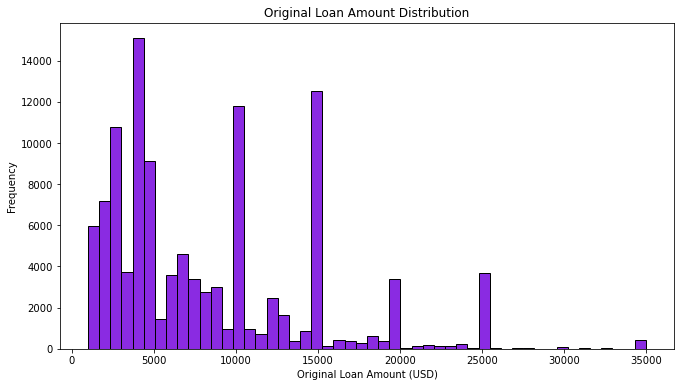

In [4]:
# distribution of original loan amount 
plt.figure(figsize=[11, 6])
plt.hist(data = loans, x = 'LoanOriginalAmount', bins = 50, color='blueviolet', edgecolor='black')
plt.title("Original Loan Amount Distribution")
plt.xlabel('Original Loan Amount (USD)')
plt.ylabel('Frequency')
plt.show();

## ProsperRating (Alpha)

We can see from the plot that the most frequent scores are C, B and D

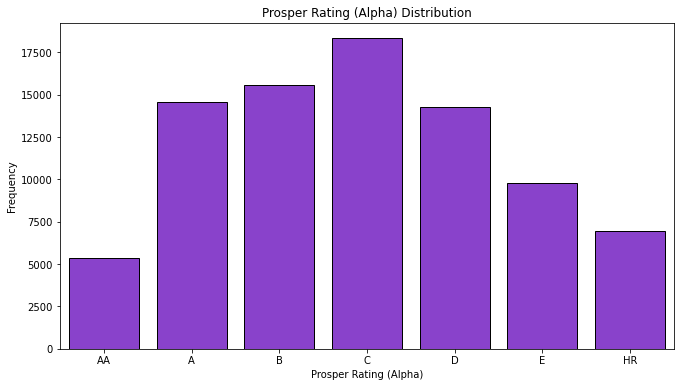

In [5]:
# distribution of ProsperRating (Alpha)

plt.figure(figsize=(11, 6))
sns.countplot(data= loans, x= 'ProsperRating (Alpha)', color='blueviolet', edgecolor='black')
plt.title('Prosper Rating (Alpha) Distribution')
plt.xlabel('Prosper Rating (Alpha)')
plt.ylabel('Frequency')
plt.show();

## Borrower APR and Original Loan Amount

The borrower APR decreases with increased loan amount

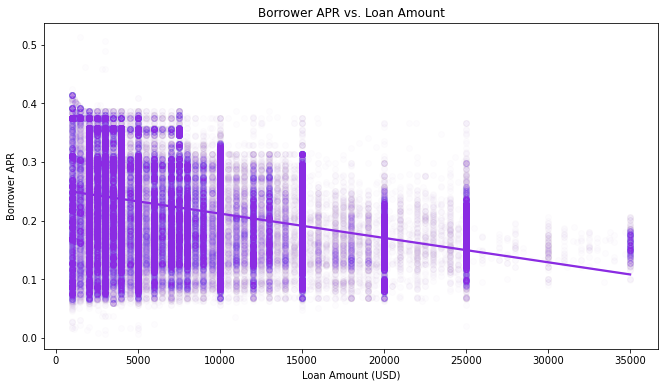

In [6]:
# create a regplot 
plt.figure(figsize = [11, 6])
sns.regplot(x = 'LoanOriginalAmount', y = 'BorrowerAPR', data = loans, scatter_kws={'alpha':0.01}, color='blueviolet')
plt.xlabel('Loan Amount (USD)')
plt.ylabel('Borrower APR')
plt.title('Borrower APR vs. Loan Amount')
plt.show();

## Borrower APR by Loan Term and Alpha Rating  

- For AA-B ratings, the APR increases with the increased of loan term.
- The APR decreases with the increased of loan term for C - HR ratings. 

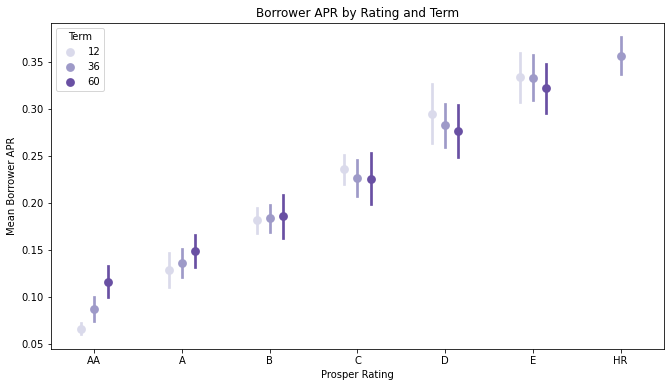

In [7]:
# plot a point plot for rating, loan term and borrower APR 

fig = plt.figure(figsize = [11,6])
sns.pointplot(data = loans, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', hue = 'Term',
           palette = 'Purples', dodge = 0.3, ci='sd', linestyles = '')
plt.title('Borrower APR across rating and term')
plt.ylabel('Mean Borrower APR')
plt.xlabel('Prosper Rating')
plt.title('Borrower APR by Rating and Term')
plt.show();

In [8]:
!jupyter nbconvert BorrowerAPR_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

^C
